In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Descrizione problema

Il dataset in esame, contiene informazioni utili per la previsione di assenza o presenza di problemi cardio vascolari.  
Tali informazioni riguardano lo stato di salute di 70000 pazienti. L'obiettivo del progetto è quello di predire una variabile discreta binaria.

In [83]:
dataset = pd.read_csv("cardio_train.csv", sep=";")

# Data exploration

In [84]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Nello specifico, le __features__ disponibile (come si può osservare dalla rappresentazione del dataset) sono:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

La variabile target è `cardio` che, come detto sopra, è binaria perciò se `0` non ha problemi cardiovascolari, al contrario assume valore `1`.

Le features in esame sono sia categoriche che continue: 
Tra le categoriche troviamo: `gender`, `cholesterol`, `glucose`, `smoking`, `alcohol intake` e `physical activity`.  
Tra le continue troviamo: `age`, `height`, `weight`, `systolic pressure` e `diastolic pressure`.

In [85]:
dataset.set_index('id', inplace=True)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Inoltre `id` identifica univocamente i record del dataset, ma che non ha alcuna importanza ai fini della previzione, quindi si procede a definire la colonna `id` come indice del dataframe pandas.

In [86]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Come si osserva dalla descrizione del dataset, si rilevano la media, il valore massimo, minimo, deviazione standard, i percentili di ogni features.  
Per esempio osserviamo sulla feature `height` che la persona più bassa misura **55** cm, la più alta **250** cm, mentre la media dell persone è **164.35** cm.  
In questo caso risulta improbabile che una persona adulta si alta **55** cm oppure **250** cm dal momento che si suppone che la popolazione in esame sia nella media e che quindi non vengono presi in esame casi "particoalri" di persone (come per esempio persone affette da nanismo o con altezze fuori dalla norma).  Questi dati che alterano le misurazioni appena effettuate, saranno valutate avanti nel processo di _data cleaning_

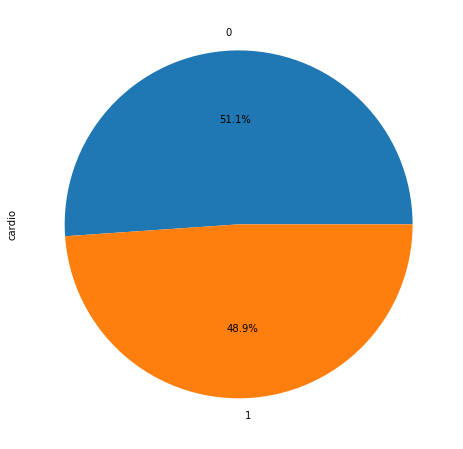

In [179]:
dataset['cardio'].value_counts().plot.pie(autopct='%1.1f%%')

Osserviamo dal grafico a torta che la variabile target `cardio` risulta essere bilanciata, ovvero il numero di istanze per le due classi sono pressoche' identiche.  Il problema in esame risulta quindi essere bilanciato; non e' necessario utilizzare tecniche di bilanciamento delle classi come per esempio `smoothing`.

### Rilevazione di valori nulli

Si rilevano, se presenti, valori nulli nel dataset.  
In questo dataset, non sono presenti valori nulli, quindi non risulta necessario trattare quest'ultimi.

In [87]:
dataset.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Data cleaning

In questa senzione andiamo a rimuore/manipolare tutti i dati che potrebbero alterare l'efficacia del modello; oltre a dati che sono semanticamente scorretti.  
Per esempio andiamo a verificare che non esestano valori di pressione **diastolica** superiori a valori della pressione **sistolica**, dal momento che non può verificarsi il caso.

In [88]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo'] > dataset['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1234 cases


Come osseriviamo dal codice precedente siamo in presenza di 1234 casi in cui la pressione **sistolica** è maggiore della **diastolica**.  
Provvediamo quindi ad eliminare i record nel dataset che presentano questa caratteristica.

In [89]:
dataset.drop(dataset[dataset['ap_lo'] > dataset['ap_hi']].index, inplace=True)

In [90]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo'] > dataset['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 0 cases


A seguito della rimozione non abbiamo più alcun dato errato in questa condizione.

Talvolta, statisticamente, è bene rimuovere dati di "bordo" che potrebbero anch'essi alterare la previsione del modello.  
Si è quindi proceduto a rimuovere tali dati con soglie del 2.5% sia superiormente che inferiormente.  
Tra le features prese in oggetto troviamo `ap_lo`, `ap_hi` che come osservato inizialmente presentavano valori anomali.

In [91]:
# Credit: https://www.kaggle.com/sulianova/eda-cardiovascular-data
dataset.drop(dataset[(dataset['ap_hi'] > dataset['ap_hi'].quantile(0.975)) | (dataset['ap_hi'] < dataset['ap_hi'].quantile(0.025))].index, inplace=True)
dataset.drop(dataset[(dataset['ap_lo'] > dataset['ap_lo'].quantile(0.975)) | (dataset['ap_lo'] < dataset['ap_lo'].quantile(0.025))].index, inplace=True)

Si rimuovono valori limite che possono essere fuorvianti, come per esempio valori negativi di pressione, o altezze e pesi fuori dalla norma.

In [92]:
dataset.drop(dataset[dataset['ap_hi'] <= 0].index, inplace=True)
dataset.drop(dataset[dataset['ap_lo'] <= 0].index, inplace=True)
dataset.drop(dataset[(dataset['height'] > 210) | (dataset['height'] < 120)].index, inplace=True)
dataset.drop(dataset[(dataset['weight'] > 140) | (dataset['weight'] < 40)].index, inplace=True)

In [93]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000,65417.000000
mean,19465.776495,1.349634,164.483162,73.946854,125.843756,81.074430,1.358194,1.223199,0.087439,0.052570,0.803522,0.489108
std,2465.186948,0.476858,7.865706,13.745189,13.895046,8.320957,0.675290,0.570274,0.282480,0.223176,0.397337,0.499885
min,10798.000000,1.000000,120.000000,40.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,140.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Effettuando ora la descrizione del dataset, otteniamo valori piuttosto coerenti con la media dei parametri delle persone.  
Per esempio osserviamo che l'altezza minima ha come valore **120** cm, quella massima **207**cm e come media **164.48** cm.  

In [94]:
dataset['age'] = (dataset['age'] / 365).round().astype('int')

Dopo la pulizia dei dati, possimo osservare che i valori di pressione `ap_lo` e `ap_hi` sono senza "rumore" o alterazioni.  
L'eta e' stata convertita da giorni in anni (per semplicita' di lettura e a fini statistici).  
E inifine per i valori di pressione, altezza e peso si sono elemininati i valori "estremi", ovvero quelli meno significativi statisticamente.

# Data exploration

Andiamo a visualizzare le distribuzioni di tutte le variabili continue del dataset.

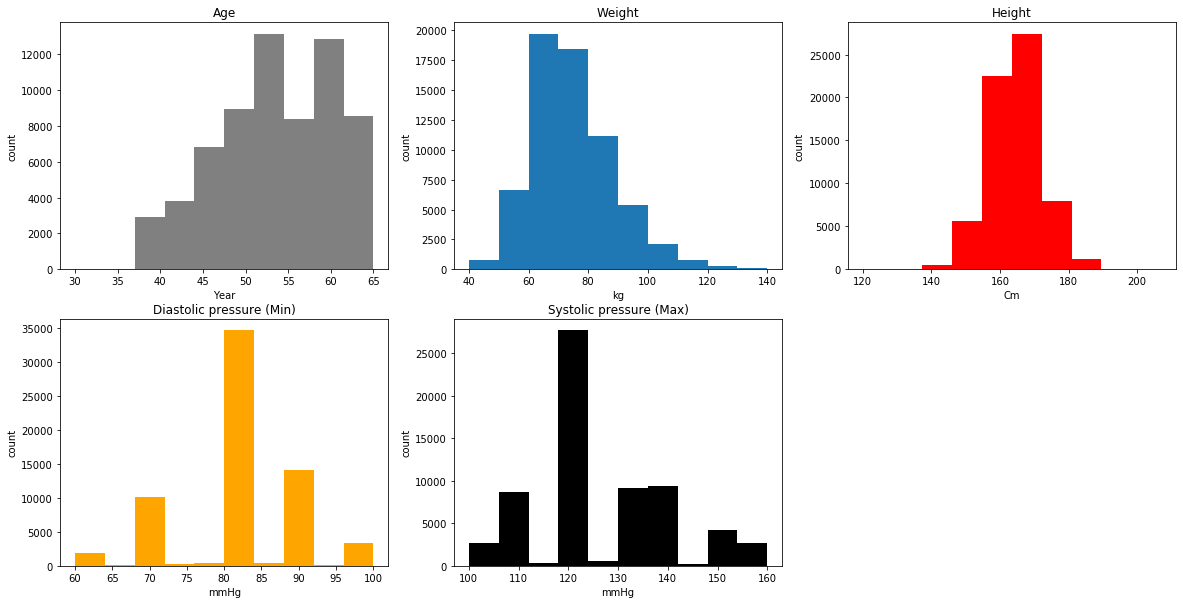

In [95]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Age')
plt.hist(dataset['age'], label="age", color='gray')
plt.ylabel('count')
plt.xlabel('Year')

plt.subplot(2, 3, 2)
plt.title('Weight')
plt.hist(dataset['weight'], label="weight")
plt.ylabel('count')
plt.xlabel('kg')

plt.subplot(2, 3, 3)
plt.title('Height')
plt.hist(dataset['height'], label="weight", color="red")
plt.ylabel('count')
plt.xlabel('Cm')

plt.subplot(2, 3, 4)
plt.title('Diastolic pressure (Min)')
plt.hist(dataset['ap_lo'], label="weight", color="orange")
plt.ylabel('count')
plt.xlabel('mmHg')

plt.subplot(2, 3, 5)
plt.title('Systolic pressure (Max)')
plt.hist(dataset['ap_hi'], label="weight", color="black")
plt.ylabel('count')
plt.xlabel('mmHg')

plt.show()

Osservando gli istogrammi, si nota che la maggior parte delle persone hanno età compresa tra i 50 e 65 anni.  
Il peso si distribuisce maggiormente tra i 60 e 80 Kg, mentre l'altezza è compresa tra i 155 e 170 cm.  
Per quanto riguarda invece la pressione, molti presentano come pressioe sistolica 80 mmHg e come massima 120 mmHg.

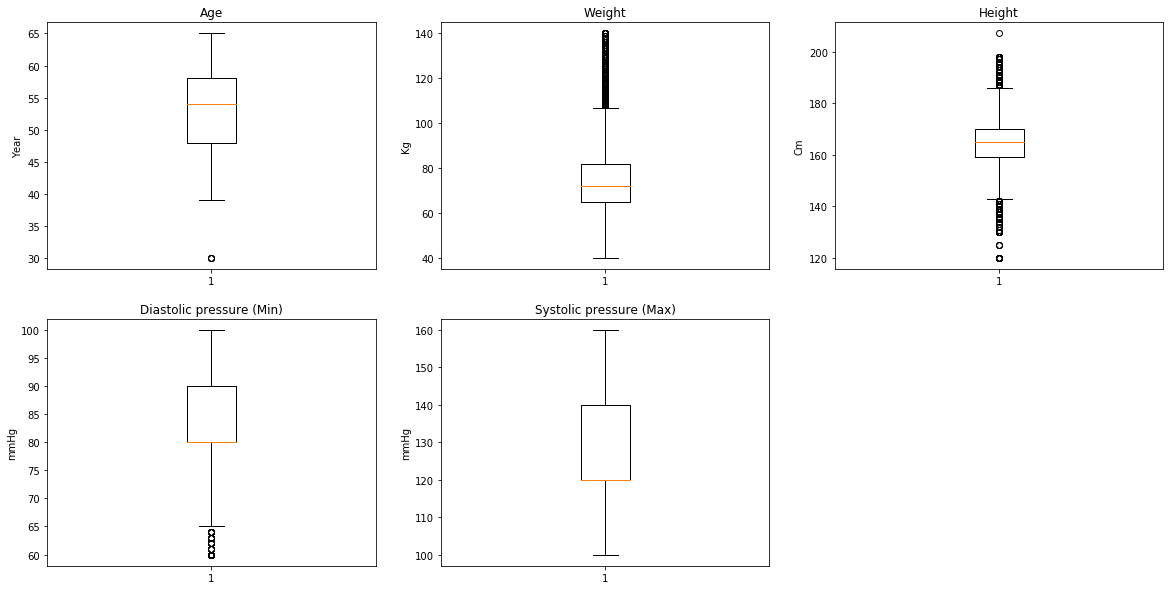

In [96]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Age')
plt.boxplot(dataset['age'])
plt.ylabel('Year')

plt.subplot(2, 3, 2)
plt.title('Weight')
plt.boxplot(dataset['weight'])
plt.ylabel('Kg')

plt.subplot(2, 3, 3)
plt.title('Height')
plt.boxplot(dataset['height'])
plt.ylabel('Cm')

plt.subplot(2, 3, 4)
plt.title('Diastolic pressure (Min)')
plt.boxplot(dataset['ap_lo'])
plt.ylabel('mmHg')

plt.subplot(2, 3, 5)
plt.title('Systolic pressure (Max)')
plt.boxplot(dataset['ap_hi'])
plt.ylabel('mmHg')

plt.show()

Andiamo ora a quantificare le possibili classi e la relativa frequenza, con un grafico a istogramma.

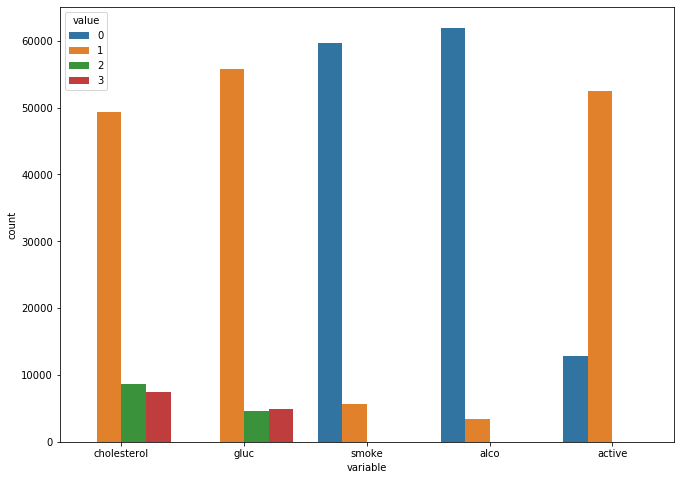

In [97]:
df_categorical = dataset.loc[:, ['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value", data= pd.melt(df_categorical));

Osserivaimo dal grafico a istogramma, che la maggior parte delle persone hanno un livello normale di colesterolo e di glucosio.  
Molte persone non sono fumatori ne dipendenti da alcool, al contrario invece molte persone effettuano attivita fisica.

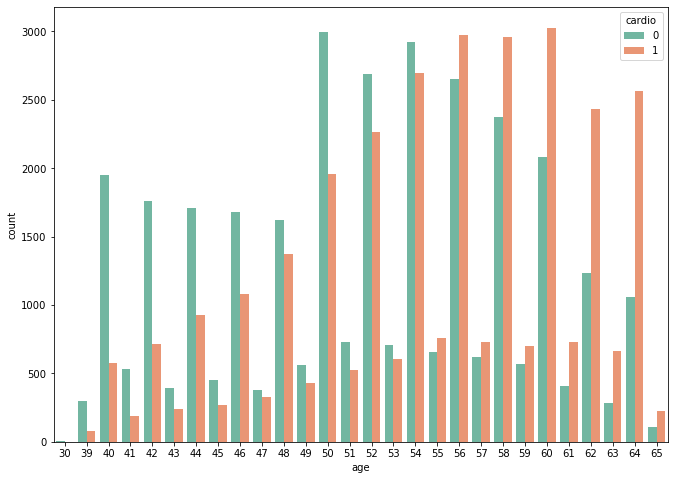

In [98]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = dataset, palette="Set2");

Risulta essere utile analizzare anche la variabile target: in questo grafico mostriamo i casi di disturbi cardiovascolari in relazione all'eta'.  
Si osserva dal grafico che il trend è che all'aumentare dell'età aumentano anche i casi di problemi cardiovascolari, in particolare dai 55 anni in poi i casi di disturbi sono maggiori dei casi senza disturbi, ciò ci porta a pensare che l'età può essere un fattore che influenza la prezenza/non presenza di disturbi cardiovascolari.

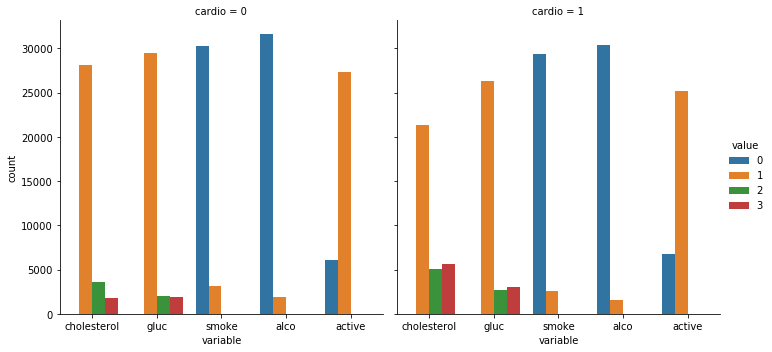

In [99]:
df_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");

Si è inoltre messo in relazione, separato in due grafici, la prezenza/non presenza di problemi cardiovascolari con il `colesterolo`, `glucosio`, `fumatore`, `dipendenza alcool` e `attività fisica`.  
Esaminiamo prima i casi senza problemi cardiaci: osservando il grafico a istogramma possiamo constatare che la maggior pare dei casi ha un livello di colesterolo nella norma; stesso discorso per quanto riguarda il livello di glucosio nel sangue.  
La maggior parte delle persone non sono fumatori, ne dipendenti da alcool ma svolgono attività fisica.
Esaminando invece i casi con problemi cardiovascolari, osserviamo che: le persone con un livello di colesterolo accettabile sono in minor parte, crescono i casi in cui il livello di colesterolo è sopra alla media e rispetto a quest'ultima classe, sono di più i casi il cui colesterolo è ben sopra alla media. Discorso analogo lo si può fare per il glucosio. Per quanto riguarda invece la dipendenza da acool, dal fumo e l'attività fisica, non si rilevano grandi differenze dal caso precedente.

In [100]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

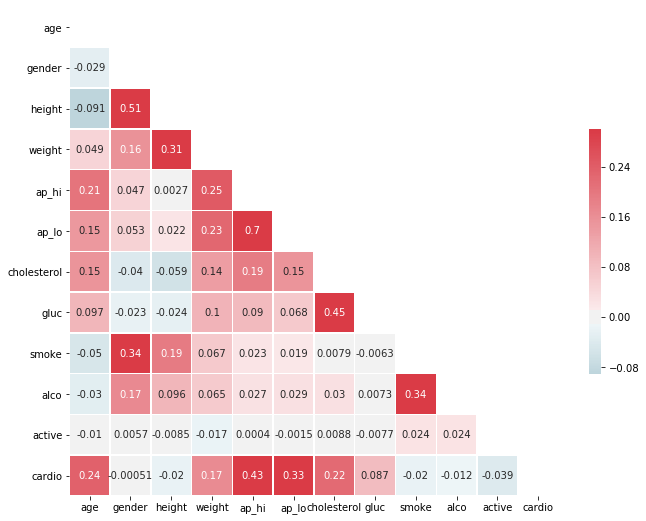

In [101]:
plot_correlation(dataset.corr())

Producendo una matrice di correlazione delle features, possiamo osservare le seguenti correlazioni rilevanti:  

* `ap_lo` vs `ap_hi`: il livello di pressione sistolica e diastolica sono piuttosto correlate, ciò non dovrebbe sorprendere dal momento che entrambe crescono in modo "lineare" e il _delta_ tra la pressione sistolica e diastolica è circa sempre lo stesso (salvo casi limite).
* `glucosio` vs `colesterolo`: dal dataset sembra trasparire il caso che se una persona ha problemi di colesterolo, allora è probabile che abbia delle anomalie anche sul livello di glucosio.
* `alcool` vs `fumo`: possiamo osservare che persone dipendenti da alcool sono anche propense ad essere fumatori.
* `cardio` vs `ap_lo` vs `ap_hi`: si nota che la presena di problemi cardiaci è abbastanza influenzata da livelli di pressione alta (sia sistolica che diastolica). Ciò può essere ragionevole dal momento che una possibile ostruzione arteriale può causare problemi cardiovascolari e conseguentemente un innalzamento della pressione.
* `cardio` vs `age`: come intuito in precedenza anche l'età influenza la presenza di problemi cardiovascolari; maggiore è l'età, maggiore è la possibilità di avere problemi cardiovascolari.
* `cardio` vs `cholesterol`: la prezenza di problemi cardiovascolari è in parte influenzata da livelli alti di colesterolo.

Infine l'attività fisica, sembra non essere correlata in alcun modo con nessuna features, quindi probabilemtne non sarà influente ai fini della previsione.

# Features engineering

> Con questa tecnica si introducono features che non erano presenti originariamente nel dataset. Le features aggiunte sono derivate direttamente o indirettamente dalle features già a disposizione nel dataset.

In questo caso una possibile feature da aggiungere è l'indice **BMI**.  
\begin{equation*}
BMI = \frac{weight_{kg}}{height_{m}^2}
\end{equation*}

In [102]:
dataset['bmi'] = (dataset['weight'] / (dataset['height'] / 100)**2)

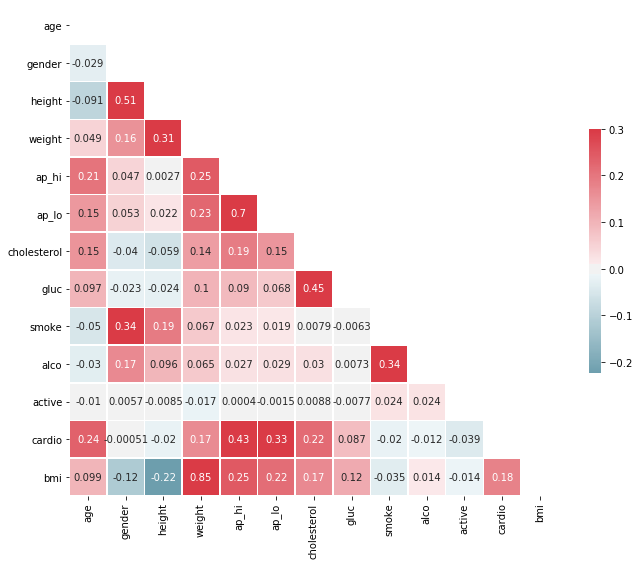

In [103]:
plot_correlation(dataset.corr())

Riproducendo la matrice di correlazione con l'aggiunta del `BMI`, possiamo osservare che introduce una piccola correlazione con la variabile traget `cardio`.  
Si suppone quindi che l'introduzione di questa feature possa essere quantomeno rilevante ai fini della previsione.

In [104]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']
target = ['cardio']

In [105]:
categorical_features = ['cholesterol', 'gluc']

In [106]:
dataset = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features)

In [107]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,0,0,1,0,21.967120,1,0,0,1,0,0
1,55,1,156,85.0,140,90,0,0,1,1,34.927679,0,0,1,1,0,0
2,52,1,165,64.0,130,70,0,0,0,1,23.507805,0,0,1,1,0,0
3,48,2,169,82.0,150,100,0,0,1,1,28.710479,1,0,0,1,0,0
4,48,1,156,56.0,100,60,0,0,0,0,23.011177,1,0,0,1,0,0


Si convertono ora le features categoriche splittando i loro valori nelle rispettive classi di appartenenza: `cholesterol` prevede 3 classi, quindi mediante questo metodo vengono create tre colonne `cholesterol_1`, `cholesterol_2` e `cholesterol_3`, sarà presente un 1 solo in corrispondenza della classe di appartenenza e 0 negli altri casi. In modo esattamente uguale si procede per la variabile `gluc`.

In [108]:
X = dataset.drop('cardio', axis=1)
y = dataset['cardio']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=43, stratify=y.values)

In [110]:
from statsmodels.stats.proportion import proportion_confint

def confidence_interval(instance, acc, confidence):    
    return proportion_confint(instance * acc, instance, 1-confidence/100, method='wilson')

In [111]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Perceptron

In [112]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

std_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))

Accuracy on train 65.47%
Accuracy on val 65.57%


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 1],
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1, 1e3, 1e6],
}

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=5, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)
print('GridSearch on Perceptron finish')

GridSearch on Perceptron finish


In [114]:
print('Best parameters:', perceptron_cv.best_params_)  
print('Best score: {:.4f}%'.format(round(perceptron_cv.best_score_ * 100, 4)))

Best parameters: {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l1', 'perceptron__tol': 1e-09, 'std': StandardScaler(copy=True, with_mean=True, with_std=True)}
Best score: 62.8387%


In [115]:
confidence = 95
lower, upper = confidence_interval(len(X_train), perceptron_cv.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 69.3965%
Pmax = 70.2374%


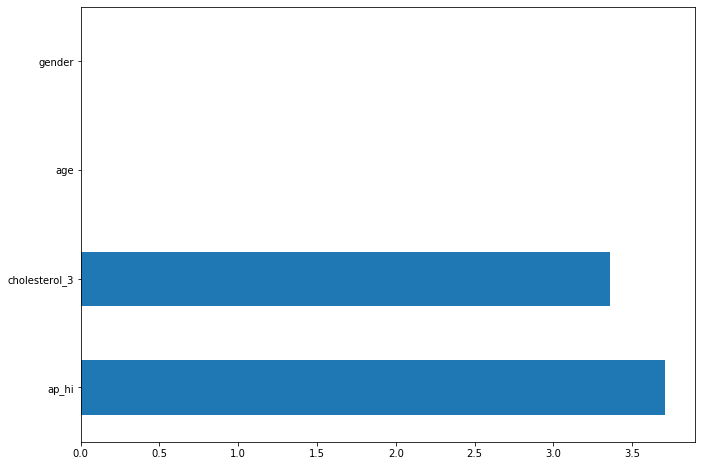

In [116]:
pc_imp = pd.Series(perceptron_cv.best_estimator_[1].coef_[0], index=X_train.columns)
pc_imp.nlargest(4).plot(kind='barh')

Possiamo osservare che a seguito della penalizzazione **l1**, trovata mediate grid search, le features che sono rilevanti in questo modello sono l'alta pressione e la soglia massima di colesterolo.  
Questo sembra ragionevole dal momento che i problemi cardiovascolari sono principalemnte causati da ipertensione e livelli di colesterolo alti.

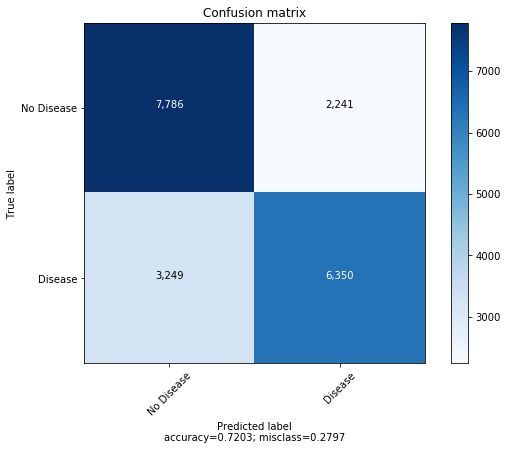

In [117]:
from sklearn.metrics import confusion_matrix
y_pred = perceptron_cv.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [118]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10027
           1       0.74      0.66      0.70      9599

    accuracy                           0.72     19626
   macro avg       0.72      0.72      0.72     19626
weighted avg       0.72      0.72      0.72     19626



In [119]:
from sklearn.metrics import mean_squared_error

perc_mse = mean_squared_error(y_val, perceptron_cv.predict(X_val))
print('MSE: {}'.format(perc_mse))

MSE: 0.2797309691225925


### Perceptron with Polynomial features

In [120]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': ['l1', 'l2'],
    'perceptron__alpha': [0.0001, 0.001, 0.01],
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1],
}

poly_perceptron_cv = GridSearchCV(poly_perceptron, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
poly_perceptron_cv.fit(X_train, y_train)
print('GridSearch on Perceptron finish')

GridSearch on Perceptron finish


In [121]:
print('Best parameters: ', poly_perceptron_cv.best_params_)  
print('Best score: {:.4f}%'.format(round(poly_perceptron_cv.best_score_ * 100, 4)))

Best parameters:  {'perceptron__alpha': 0.001, 'perceptron__penalty': 'l1', 'perceptron__tol': 1, 'std': StandardScaler(copy=True, with_mean=True, with_std=True)}
Best score: 63.8176%


In [122]:
confidence = 95
lower, upper = confidence_interval(len(X_val), poly_perceptron_cv.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 61.3431%
Pmax = 62.7010%


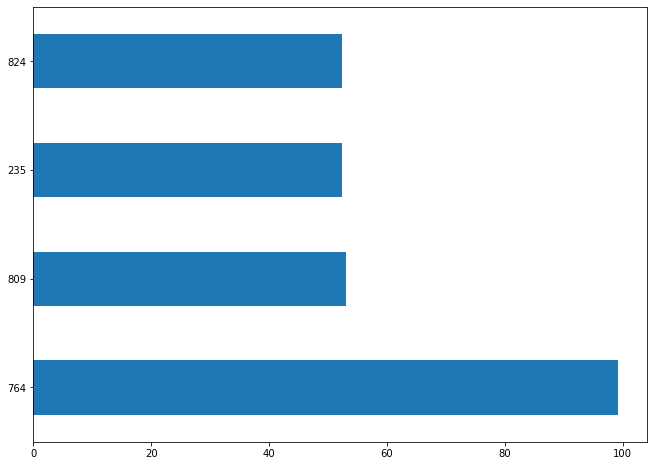

In [123]:
pc_imp = pd.Series(poly_perceptron_cv.best_estimator_[2].coef_[0])
pc_imp.nlargest(4).plot(kind='barh')

L'introduzione di features polinomiali sembra non aver migliorato il modello precedente, osserviamo che le features rilevanti per il modello sono una combinazione delle features orginali, non producendo di fatto un risultato utile ai fini della valutazione semantica del modello.

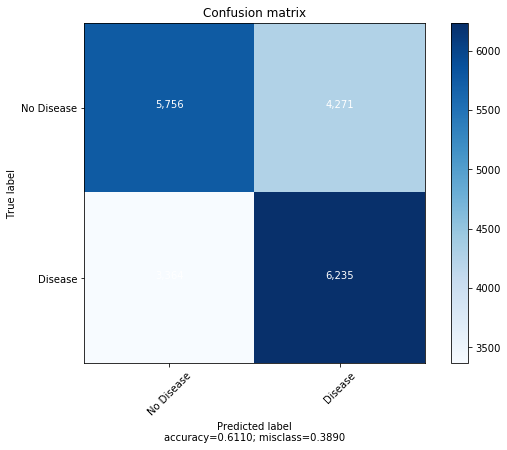

In [124]:
y_pred = poly_perceptron_cv.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [125]:
pred = poly_perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     10027
           1       0.59      0.65      0.62      9599

    accuracy                           0.61     19626
   macro avg       0.61      0.61      0.61     19626
weighted avg       0.61      0.61      0.61     19626



In [126]:
from sklearn.metrics import mean_squared_error

poly_mse = mean_squared_error(y_val, poly_perceptron_cv.predict(X_val))
print('MSE: {}'.format(poly_mse))

MSE: 0.38902476306939776


# Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(dual=False))
])

parameters = {
    'lr__penalty': ['l1'],
    'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
    'lr__C': [1, 0.8, 0.3],
    'lr__solver': ['liblinear']
}

lr_gs = GridSearchCV(std_lr, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
lr_gs.fit(X_train, y_train)
print("Grid search finish")

Grid search finish


In [128]:
print('Best parameters:', lr_gs.best_params_)  
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(lr_gs.best_score_ * 100, 4), round(lr_gs.score(X_val, y_val)*100, 4)))

Best parameters: {'lr__C': 0.3, 'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'lr__tol': 0.01}
Best train score: 69.6251%
Best validation score: 70.1809%


In [129]:
confidence = 95
lower, upper = confidence_interval(len(X_val), lr_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 68.9779%
Pmax = 70.2646%


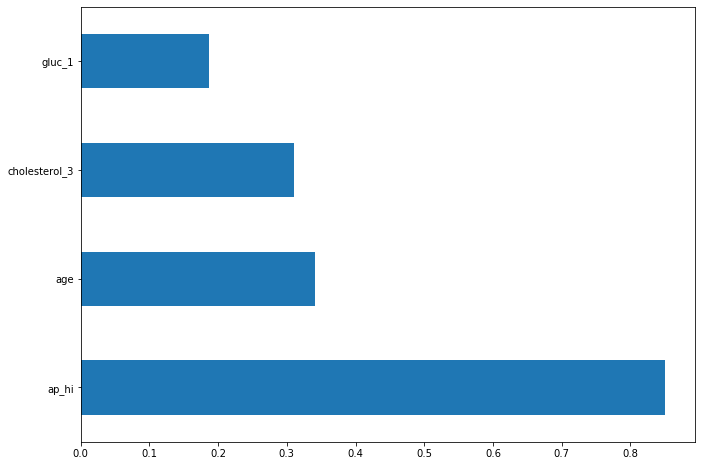

In [130]:
lr_imp = pd.Series(lr_gs.best_estimator_[1].coef_[0], index=X_train.columns)
lr_imp.nlargest(4).plot(kind='barh')

La regressione logistica evidenzia come features rilevanti, ai fini della previsione proposta dal modello, la pressione massima, l'eta la soglia massima di colesterolo e il peso.  
Anche in questo caso le features evidenziati sono ragionevoli in quanto, come visto in fase esplorativa inizialmente, al crescere dell'eta cresce anche il rischio di problemi cardiovascolari. Inoltre il peso potrebbe essere un indicatore di una dieta sedentaria e quindi indice di possibili problemi cardiovascolari.

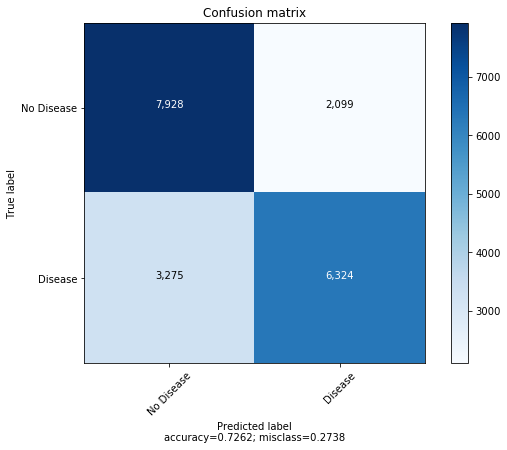

In [131]:
y_pred = lr_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [132]:
pred = lr_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10027
           1       0.75      0.66      0.70      9599

    accuracy                           0.73     19626
   macro avg       0.73      0.72      0.72     19626
weighted avg       0.73      0.73      0.72     19626



In [133]:
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(y_val, lr_gs.predict(X_val))
print('MSE: {}'.format(lr_mse))

MSE: 0.27382044227045754


# SVM

In [134]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC())
])

parameters = {
    'svm__kernel': ['rbf'],
    'svm__C': [0.01, 0.1, 1],
}

svm_gs = GridSearchCV(std_svm, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='f1')
svm_gs.fit(X_train, y_train)
print('Finish SVM Grid Search')

/usr/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Finish SVM Grid Search


In [135]:
print('Best parameters:', svm_gs.best_params_)  
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(svm_gs.best_score_ * 100, 4), round(svm_gs.score(X_val, y_val)*100, 4)))

Best parameters: {'svm__C': 1, 'svm__kernel': 'rbf'}
Best train score: 69.7002%
Best validation score: 70.2832%


In [163]:
confidence = 95
lower, upper = confidence_interval(len(X_val), svm_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 69.6399%
Pmax = 70.9186%


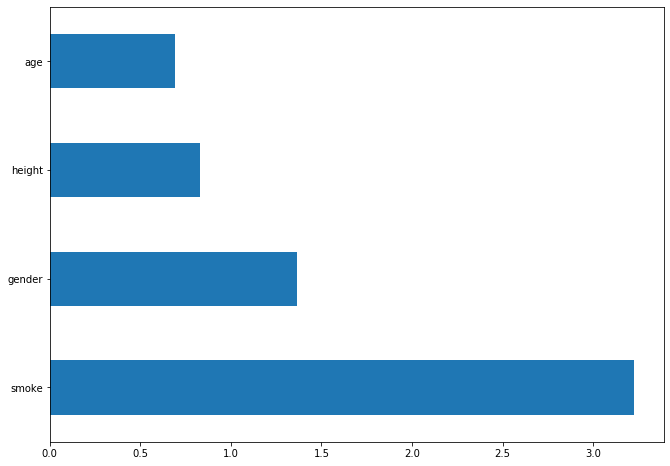

In [136]:
svm_imp = pd.Series(svm_gs.best_estimator_[1].support_vectors_[0], index=X_train.columns)
svm_imp.nlargest(4).plot(kind='barh')

SVM evidenzia come features di maggiore rilevanza: l'essere fumatori, il sesso, l'altezza e l'eta.  
Sicuramente l'essere fumatori indice nevativamente sul sistema cardio-circolatorio aumentando quindi i rischi di problemi cardiaci.  
Il sesso e l'altezza vengono considerati rilevanti per determinare il rischio di problemi cardio-vascolari, questo risulta abbastanza assurdo in quanto non esistono riferimenti medici che provino che altezza e sesso siano determinanti ai fini di problemi cardiovascolari.  
Cio' nonostante il modello risulta piuttosto accurato e preciso nella previsione.

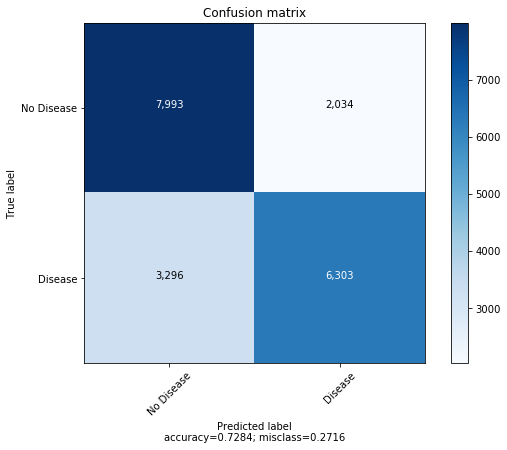

In [137]:
y_pred = svm_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [138]:
pred = svm_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10027
           1       0.76      0.66      0.70      9599

    accuracy                           0.73     19626
   macro avg       0.73      0.73      0.73     19626
weighted avg       0.73      0.73      0.73     19626



In [139]:
from sklearn.metrics import mean_squared_error

svm_mse = mean_squared_error(y_val, svm_gs.predict(X_val))
print('MSE: {}'.format(svm_mse))

MSE: 0.27157851829206153


# Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [2, 4, 6, 8, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__min_samples_split': [2, 5, 10],
}
    

rfc_gs = GridSearchCV(rfc, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
rfc_gs.fit(X_train, y_train)

print('Random Forest GridSearch finish')

/usr/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Random Forest GridSearch finish


In [141]:
print('Best parameters:',rfc_gs.best_params_)  
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(rfc_gs.best_score_ * 100, 4), round(rfc_gs.score(X_val, y_val)*100, 4)))

Best parameters: {'rfc__max_depth': 10, 'rfc__min_samples_leaf': 4, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 100}
Best score: 70.0018%


In [142]:
confidence = 95
lower, upper = confidence_interval(len(X_val), rfc_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 69.3568%
Pmax = 70.6389%


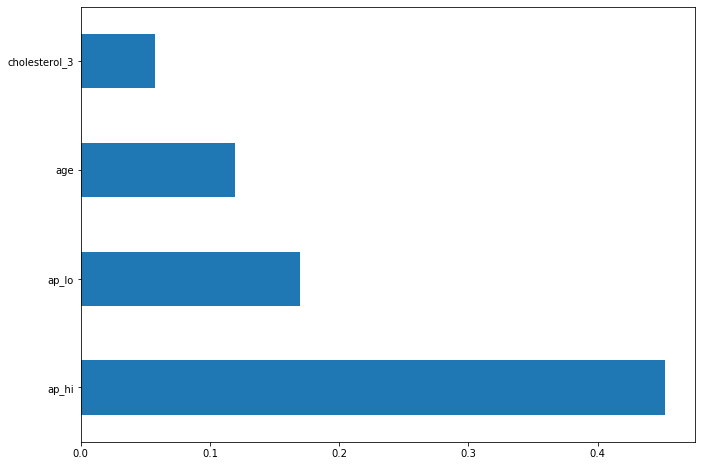

In [143]:
rfc_imp = pd.Series(rfc_gs.best_estimator_[1].feature_importances_, index=X_train.columns)
rfc_imp.nlargest(4).plot(kind='barh')

Random Forest evidenzia che la pressione massima, quella minima, l'eta e il colesterolo sono determinanti ai fini della previsione.  
Come nei casi precedenti questo e' ragionevole, in particolare sembra che un livello piuttosto alto di pressione diastolica sia piuttosto determinante a riconoscere problemi cardiovascolari, in misura minore lo stesso discorso lo si puo' fare per la pressione sistolica. Quindi persone con pressione alta, sono maggiormante inclini ad avere problemi cardio vascolari.  Anche in questo modello eta' e colesterolo sono rilevanti ai fini della previsione.

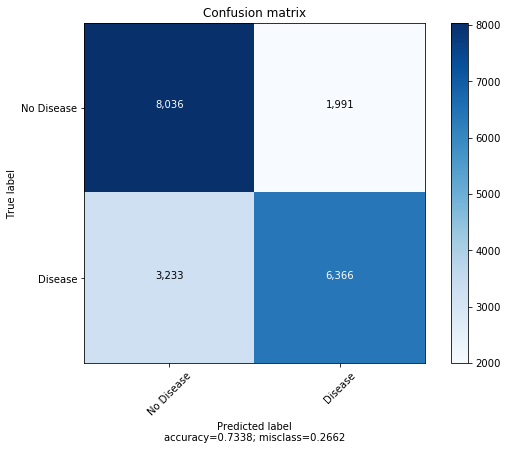

In [144]:
y_pred = rfc_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [145]:
pred = rfc_gs.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10027
           1       0.76      0.66      0.71      9599

    accuracy                           0.73     19626
   macro avg       0.74      0.73      0.73     19626
weighted avg       0.74      0.73      0.73     19626



In [146]:
from sklearn.metrics import mean_squared_error

rfc_mse = mean_squared_error(y_val, rfc_gs.predict(X_val))
print('MSE: {}'.format(rfc_mse))

MSE: 0.26617751961683483


# XGBoost

In [147]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic'))
])

parameters = {
    'xgb__eta': [0.002, 0.1, 0.5],
    #'xgb__min_child_weight': [4, 10],
    'xgb__max_depth': [6],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001]
}

xgb_gs = GridSearchCV(std_xgb, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='accuracy')
xgb_gs.fit(X_train, y_train)
print("Grid Search Xgboost finish")

/usr/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Grid Search Xgboost finish


In [148]:
print('Best parameters:', xgb_gs.best_params_)  
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(xgb_gs.best_score_ * 100, 4), round(xgb_gs.score(X_val, y_val)*100, 4)))

Best parameters: {'xgb__alpha': 0.0001, 'xgb__eta': 0.002, 'xgb__max_depth': 6, 'xgb__n_estimators': 150}
Best score: 72.4728%


In [162]:
confidence = 95
lower, upper = confidence_interval(len(X_val), xgb_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))

Interval with confidence 95%: 
Pmin = 72.5336%
Pmax = 73.7734%


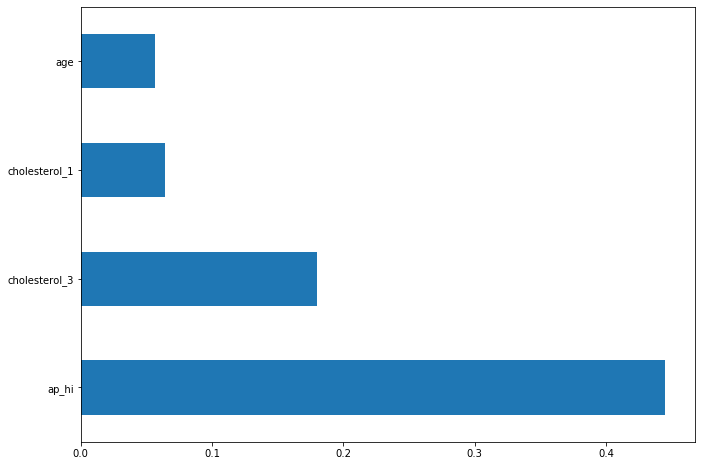

In [150]:
from xgboost import plot_importance

xgb_imp = pd.Series(xgb_gs.best_estimator_[1].feature_importances_, index=X_train.columns)
xgb_imp.nlargest(4).plot(kind='barh')

XGBoost evidenzia che un livello alto di pressione diastolica e' indice di possibili problemi cardiovascolari, come un livello alto di colesterolo. In questo caso il modello considera anche la soglia normale di colesterolo come influente ai fini della previsione, il che risulta una forzatura dal momento che questo paramentro non comporta alcun rischio a livello medico. Infine l'eta' influenza, in minor parte, la previsione.

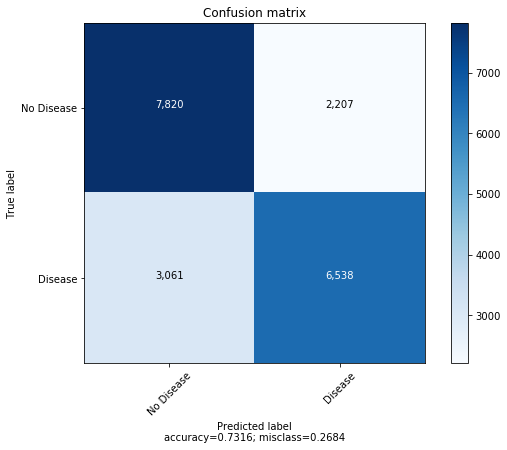

In [151]:
y_pred = xgb_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [152]:
pred = xgb_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10027
           1       0.75      0.68      0.71      9599

    accuracy                           0.73     19626
   macro avg       0.73      0.73      0.73     19626
weighted avg       0.73      0.73      0.73     19626



In [153]:
from sklearn.metrics import mean_squared_error

xgb_mse = mean_squared_error(y_val, xgb_gs.predict(X_val))
print('MSE: {}'.format(xgb_mse))

MSE: 0.2684194435952308


# Model comparison

In [154]:
def model_comparison(mse_1, mse_2):
    d = np.abs(mse_1 - mse_2)
    variance = (mse_1 * (1 - mse_1)) / len(X_val) + (mse_2 * (1 - mse_2)) / len(X_val)
    d_min = d - 1.96 * np.sqrt(variance)
    d_max = d + 1.96 * np.sqrt(variance)
    return (d_min, d_max)

### XGBoost vs SVM

In [155]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, svm_mse), 4)))

Interval [-0.0056  0.0119]


### XGBoost vs Perceptron

In [156]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, perc_mse), 4)))

Interval [0.0025 0.0201]


### XGBoost vs Logistic regression

In [157]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, lr_mse), 4)))

Interval [-0.0034  0.0142]


### XGBoost vs Random Forest

In [158]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, rfc_mse), 4)))

Interval [-0.0065  0.011 ]


### Perceptron vs Logistic Regression

In [159]:
print('Interval {}'.format(np.round(model_comparison(perc_mse, lr_mse), 4)))

Interval [-0.0029  0.0148]


### Perceptron vs Random Forest

In [160]:
print('Interval {}'.format(np.round(model_comparison(perc_mse, rfc_mse), 4)))

Interval [0.0047 0.0224]


In questa sezione abbiamo analizzato quali modelli fossero simili tra loro e quali avessero differenze rilevanti.  
**SVM** e **XGBoost** hanno ottenuto risultati piuttosto simili in termini di `accuracy` e `f1-score`, quindi ci aspettavamo che non esistessero differenze rilevanti tra i due e mediante una verifica analitica abbiamo constatato che effettivamente i due modelli sono simili in termini statistici.  
Al contrario invece **XGBoost** e **Perceptron** hanno ottenuto valori abbastanza diversi di `accuracy` e `f1-score`, quindi ci si aspetta che siano significativamente differenti; verificando e' risultato che questi ultimi due modelli sono significativamente differenti (sempre in termini statistici), in favore di XGBoost in quanto ha ottenuto risultati migliori.

# Model serialization

In [273]:
import pickle

#XGB
model_serialize = open("models/xgb-model.mdl", 'wb')
pickle.dump(xgb_gs, model_serialize)
model_serialize.close()

#Logistic Regression
model_serialize = open("models/lr-model.mdl", 'wb')
pickle.dump(lr_gs, model_serialize)
model_serialize.close()

#SVM
model_serialize = open("models/svm-model.mdl", 'wb')
pickle.dump(svm_gs, model_serialize)
model_serialize.close()

#Random Forese
model_serialize = open("models/rf-model.mdl", 'wb')
pickle.dump(rfc_gs, model_serialize)
model_serialize.close()

#Percepron
model_serialize = open("models/pct-model.mdl", 'wb')
pickle.dump(perceptron_cv, model_serialize)
model_serialize.close()

# Neural Network

In [217]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    plt.show()

In [260]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D
from tensorflow.keras import backend as K

scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

std_y_train = to_categorical(y_train)
std_y_val = to_categorical(y_val)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
        
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
        
def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def nn_build_model():
    model = Sequential([
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        Dropout(0.5),
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dropout(0.5),
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dropout(0.5),
        Dense(1, kernel_initializer='random_uniform', activation=tf.nn.sigmoid)
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', f1_score])
    return model

In [264]:
model = nn_build_model()
history = model.fit(std_X_train, y_train, validation_split=0.3, batch_size=128, epochs=100, verbose=0, callbacks=[PrintDot()])


....................................................................................................

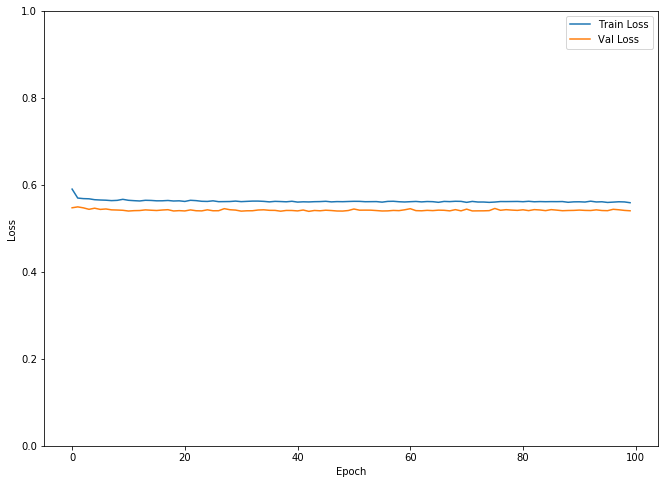

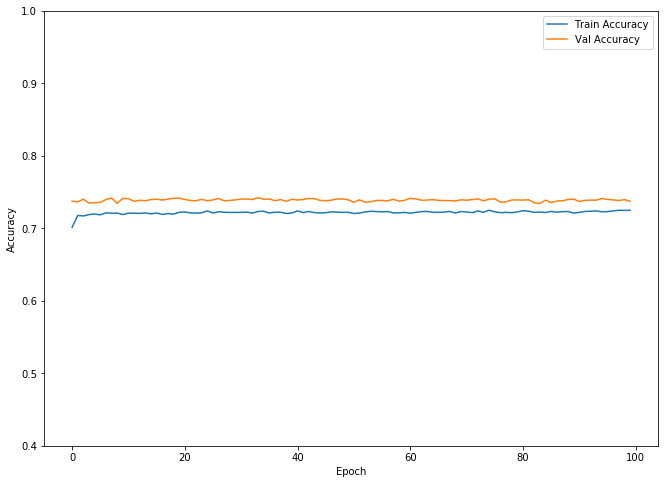

In [265]:
hist = pd.DataFrame(history.history)
plot_history(history)

In [266]:
model.evaluate(scaler_X.transform(X_val), y_val, batch_size=128)

19626/19626 [==============================] - 0s 7us/sample - loss: 0.5501 - acc: 0.7308 - f1_score: 0.7057


[0.5501434126268842, 0.7307653, 0.7056735]

In [267]:
y_pred = model.predict(scaler_X.transform(X_val))
y_pred =(y_pred > 0.5)

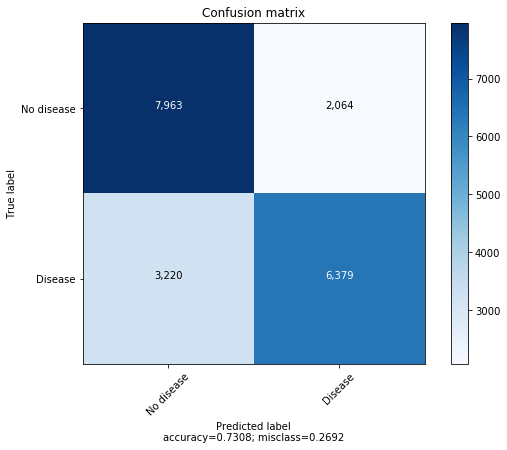

In [268]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, target_names=['No disease', 'Disease'], normalize=False)

In [269]:
pred = model.predict(scaler_X.transform(X_val))
pred = (pred > 0.5)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10027
           1       0.76      0.66      0.71      9599

    accuracy                           0.73     19626
   macro avg       0.73      0.73      0.73     19626
weighted avg       0.73      0.73      0.73     19626



## Save NN model

In [277]:
model.save('models/nn-model.h5')